# Bike Sharing Prediction

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. 
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. 
The goal of the current exercise is to model the demand for shared bikes with the available independent variables. The result will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## I. Preparation

### 1. Importing libraries used for the exercise

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### 2. Setting general parameters for data visualization 

In [2]:
# Setting the font size and figure size for all plots 
sns.set(font_scale=1.3, rc={'figure.figsize':(11.7,8.27)})

### 3. Reading the dataset 

The current analysis uses one dataset that we read from the 'day.csv'. The 'day.csv' has the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [3]:
df = pd.read_csv('day.csv')

In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## II. EDA

In [5]:
# General info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Searching for missing information 
df.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [7]:
#Checking if the sum of casual and registered values equals to cnt 
(df.cnt == df.casual+df.registered).all()

True

#### Outlier detection
Based on what we have seen so far, the categorical variables (stored as numeric) are ok from this perspective (min, max, mean values). Plus those will be transformed into dummies later. Let's however have a closer look on the continuous variables

In [8]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

print('upper')
for i in ['temp', 'atemp', 'windspeed', 'hum', 'cnt']:
    if df[i][(df[i] > (q3[i] + 1.5*iqr[i]))].count()>0:
        print(i)
        print(df[i][(df[i] > (q3[i] + 1.5*iqr[i]))])
print('lower')
for i in ['temp', 'atemp', 'windspeed', 'hum', 'cnt']:
    if df[i][(df[i] < (q1[i] - 1.5*iqr[i]))].count()>0:
        print(i)
        print(df[i][(df[i] < (q1[i] - 1.5*iqr[i]))])

upper
windspeed
44     27.999836
49     34.000021
93     25.833257
94     26.000489
292    28.292425
382    27.833743
407    27.417204
420    28.250014
431    29.584721
432    27.791600
449    25.917007
665    26.666536
720    27.292182
Name: windspeed, dtype: float64
lower
hum
49    18.7917
68     0.0000
Name: hum, dtype: float64


We identified two columns with outliers. Windspeed and humidity. The windspeed seems to be ok. I mean technically we are talking about outliers of course, but the measurement itself seem to be ok.  It seems to me that these are just simply extremely windy days. I leave them untouched for now.
The humidity however can't be zero. Here we might have a measurement problem. The two humidty values I fill with the mean not to lose those records.

In [9]:
df.loc[68,'hum'] = df.hum.mean()
df.loc[49,'hum'] = df.hum.mean()

#### Note:
- No missing informaition.
- All variables (including the unordered categorical ones as well) are stored technically as numeric.
- 'cnt' is the target variable that brakes down into 'registered' and 'casual' counts. The last two will be deleted before the modeling as we are interested in the total number of rentals
- There were some outliers found. 

### 1. Visualizing the data

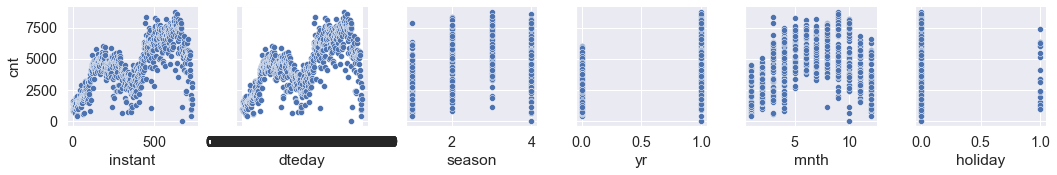

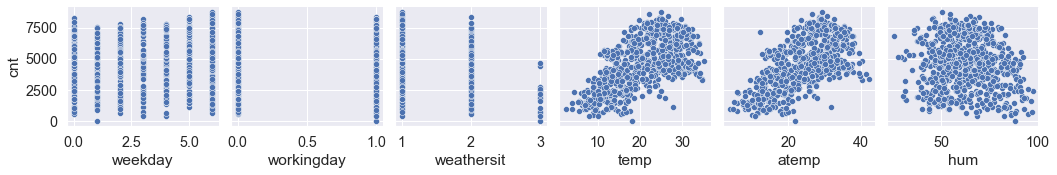

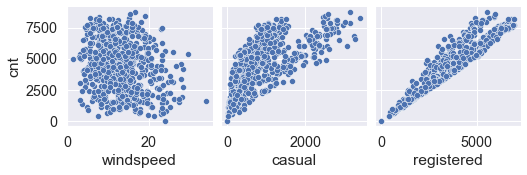

In [10]:
features = df.columns.tolist()
features.remove('cnt')
sns.pairplot(data=df, x_vars=features[:6], y_vars='cnt')
sns.pairplot(data=df, x_vars=features[6:12], y_vars='cnt')
sns.pairplot(data=df, x_vars=features[12:], y_vars='cnt')

#### Note:
- The 'ID' ('instant') must have been issued in chronological order as it shows the same pattern as the dteday column
- Seasonality is clearly visible from the dteday-cnt correlation. There is a seasonality that can be observed in both years plus most probably there is a trend explained by the age of the company (numbers for year two are higher)
- The relation between the dates / months / seasons and the target variable is clearly non-linear. The scope of the current exercise is linear regression. However based on the plots above, it is logical to experiment with  some non-linear predictors in the future. 
- Temp and atemp show a clear strong linear relation with the target variable. 
- Casual and registered are naturally strongly correlated. 


### 2. Category variables
Category variables are stored as numeric and it is misleading for the model. It has to be addressed before model building

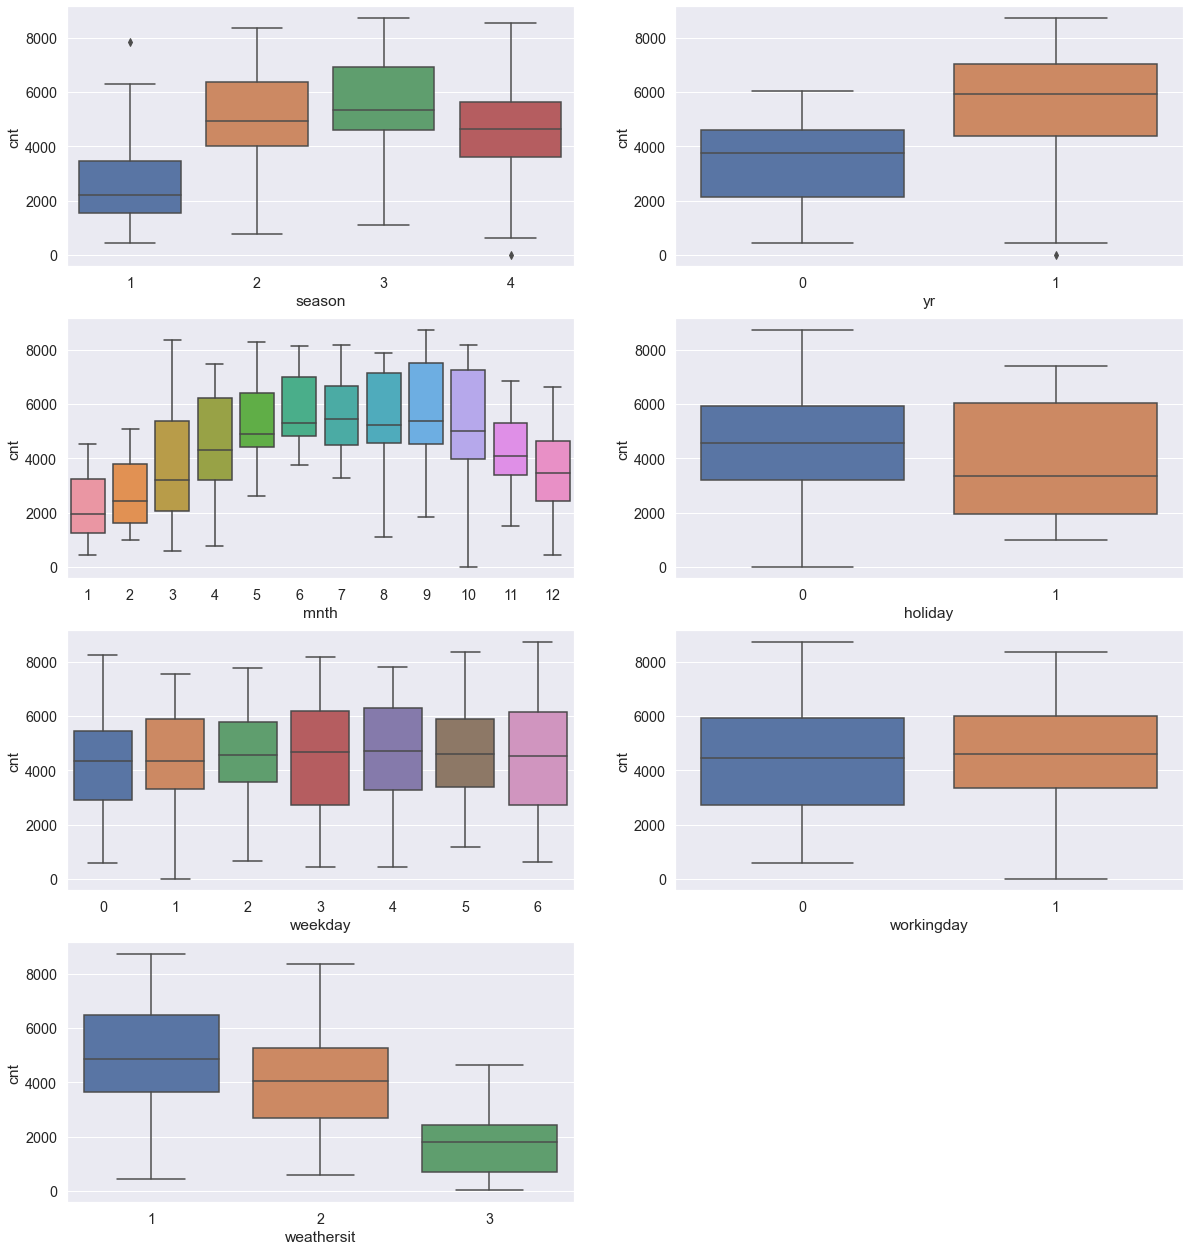

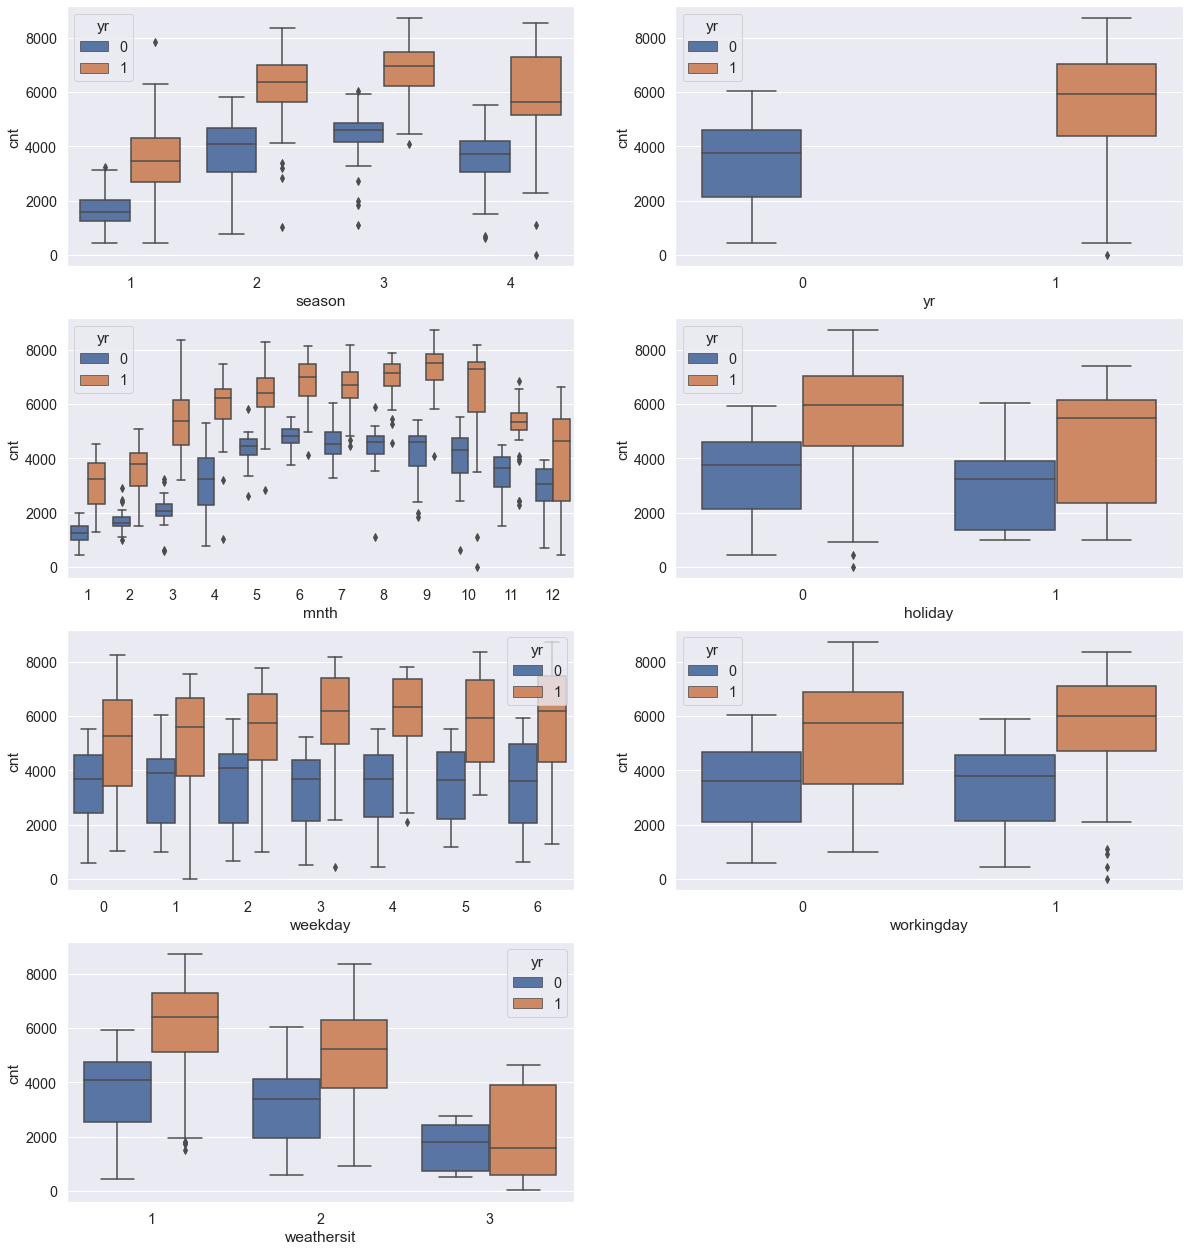

In [11]:
# category variables
category = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# plotting the correlation
plt.figure(figsize=(20, 22))

for i, c in enumerate(category):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=df, x=c, y='cnt')
plt.show()

# plotting once again, this time separately for the two years
plt.figure(figsize=(20, 22))

for i, c in enumerate(category):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=df, x=c, y='cnt', hue='yr')
plt.show()

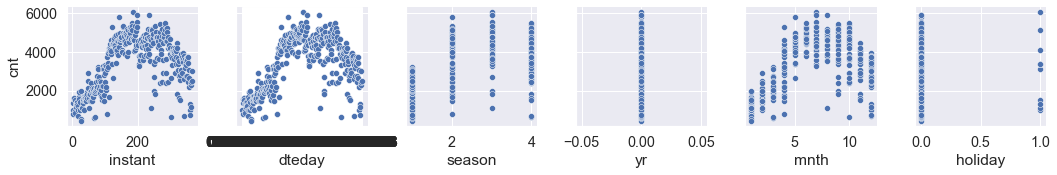

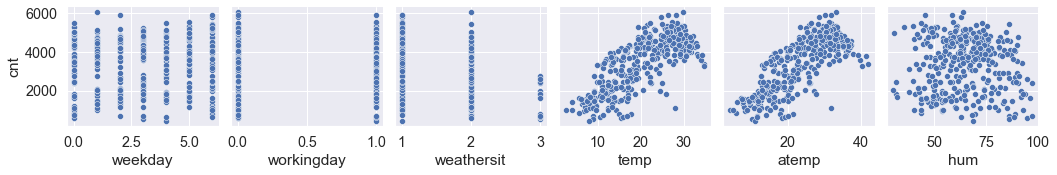

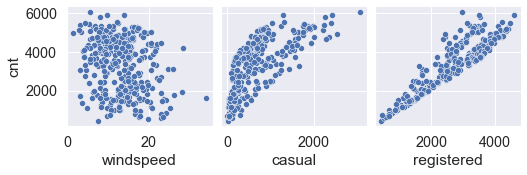

In [12]:
features = df.columns.tolist()
features.remove('cnt')
sns.pairplot(data=df[df.yr==0], x_vars=features[:6], y_vars='cnt')
sns.pairplot(data=df[df.yr==0], x_vars=features[6:12], y_vars='cnt')
sns.pairplot(data=df[df.yr==0], x_vars=features[12:], y_vars='cnt')

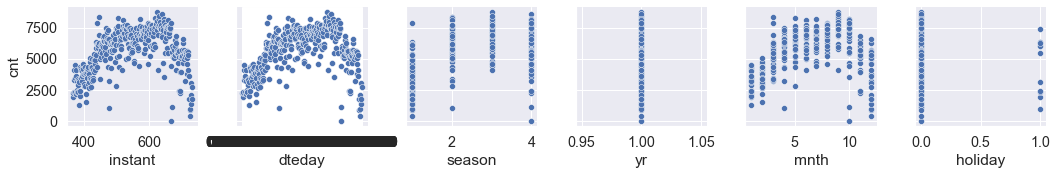

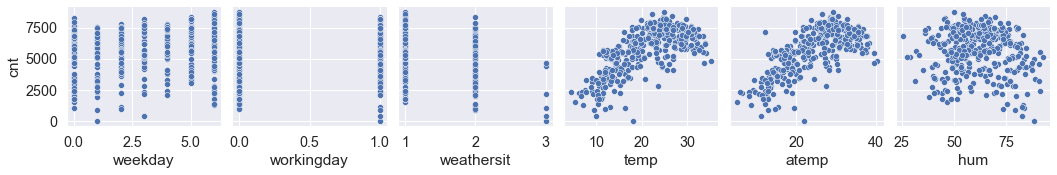

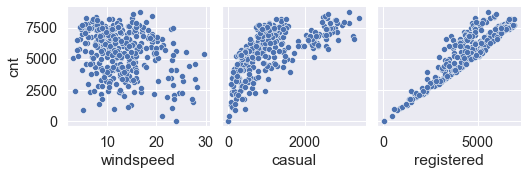

In [13]:
features = df.columns.tolist()
features.remove('cnt')
sns.pairplot(data=df[df.yr==1], x_vars=features[:6], y_vars='cnt')
sns.pairplot(data=df[df.yr==1], x_vars=features[6:12], y_vars='cnt')
sns.pairplot(data=df[df.yr==1], x_vars=features[12:], y_vars='cnt')

#### Note:
- The patterns that were observed on the scatterplot can be observed here as well
- Most of the patterns are the same for both years
- Interestingly the spread of the data is bigger for the second year in some cases. The weather situation seems to have a greater impact on the bike rentals in year two than in year one. The same applies for the workingday/holiday as seen on the boxplots
- It is also visible that we loose some linearity for the second year in case of temp. Like for extreme high temperatures the count starts to decline for year two. 
One explanation for these could be the composition of customer base. It is possible that for year one (new company, less mainstream) mostly "hardcore bikers" went with the solution. As the company gained traction for year two, more "hobby bikers" joined who are less tolearant for weather changes. But this is a hipothesis only. 

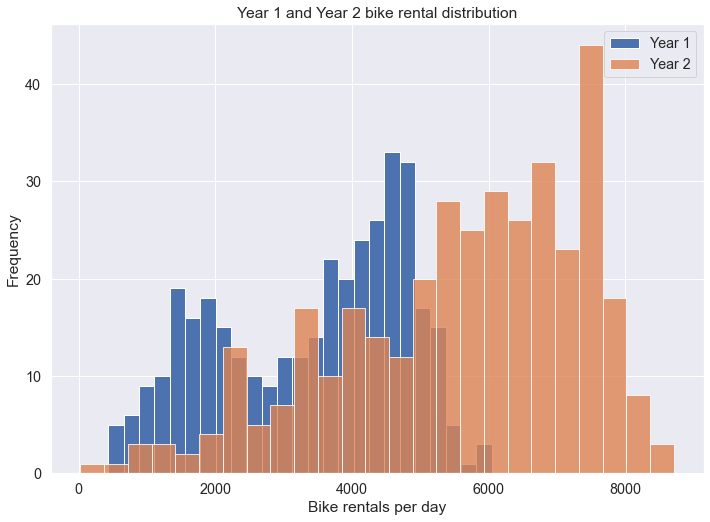

In [14]:
fig, ax = plt.subplots()
df[df['yr']==0].cnt.plot.hist(bins=25, ax=ax)
df[df['yr']==1].cnt.plot.hist(bins=25, ax=ax, alpha=0.8)

plt.title('Year 1 and Year 2 bike rental distribution')
plt.xlabel('Bike rentals per day')
ax.legend(['Year 1', 'Year 2'])
plt.show()

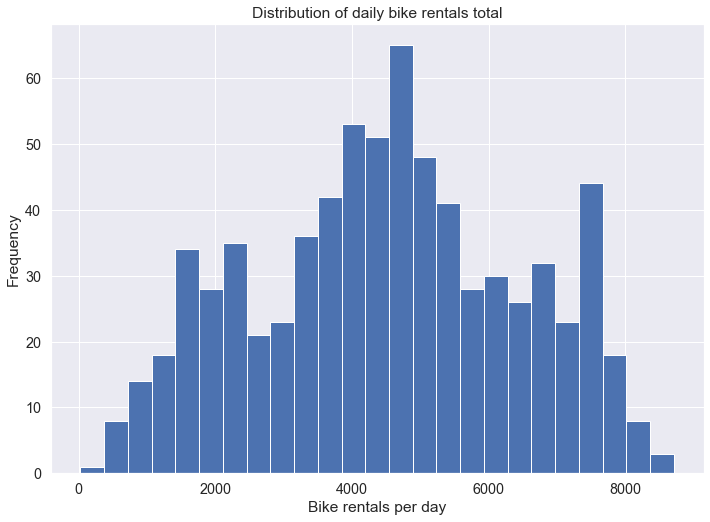

In [15]:
df.cnt.plot.hist(bins=25)

plt.title('Distribution of daily bike rentals total')
plt.xlabel('Bike rentals per day')
plt.show()

#### Note:

The distribution of the target variable is different for the two years. Clearly there has been a dataset shift which has to be addressed (not scope of the current excercise).

In [16]:
df.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.001251,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.198318,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.125355,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.217567,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.017790,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.043795,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.021512,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.617451,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.125334,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.138845,-0.183876,0.543362,0.543678,0.630685


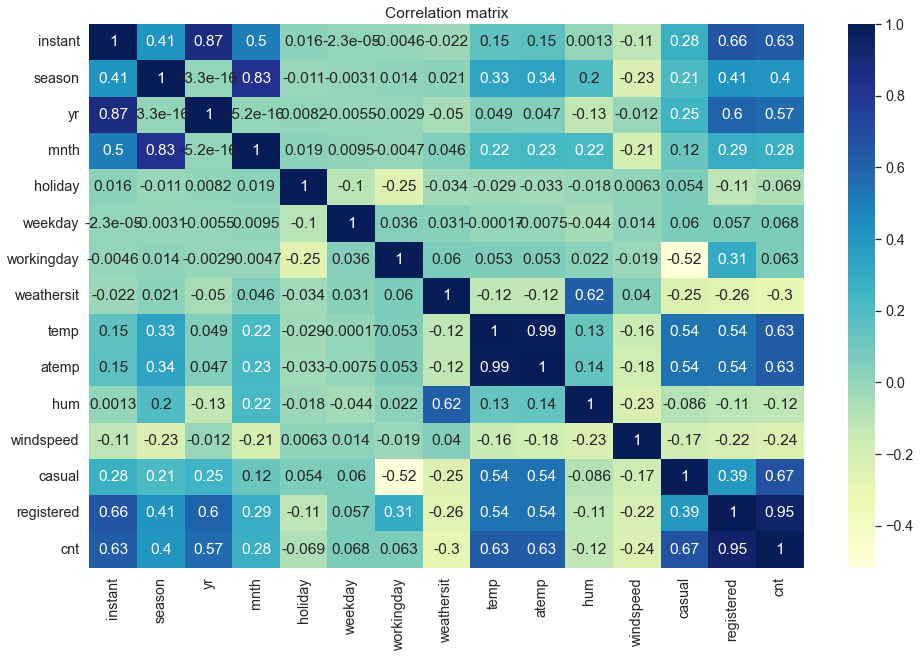

In [17]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation matrix')
plt.show()

## III. Data preparation

In [18]:
# Check if unique is indeed the id
len(df.instant.unique()) == 730

True

### 1. Removing variables

Dropping
- the id ('instant'), the 'date' as these are non-numeric and contain 730 unique values
- 'casual' and 'registered' as these are parts of the target variable

In [19]:
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

### 2. Creating dummy variables from the categorical ones

In [20]:
# Creating data dictionaries for mapping

season_dict = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
weathersit_dict = {1:'clear', 2:'cloudy', 3:'light_precip', 3:'heavy_precip'}
weekday_dict = {0: 'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
mnth_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Maj', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12:'Dec'}

In [21]:
df.season = df.season.map(season_dict)

In [22]:
df.weathersit = df.weathersit.map(weathersit_dict)

In [23]:
df["day_of_week"]=df.weekday.map(weekday_dict)

In [24]:
#df['mnth_in_bsnss'] = df.apply(lambda x: x.mnth if x.yr ==0 else x.mnth+12, axis=1)

In [25]:
df['mnth'] = df.mnth.map(mnth_dict)

In [26]:
df = pd.concat([df, pd.get_dummies(df.weathersit, drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df.season, drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df.day_of_week, drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df.mnth, drop_first=True)], axis=1)

Text(0, 0.5, 'Mean bike rental')

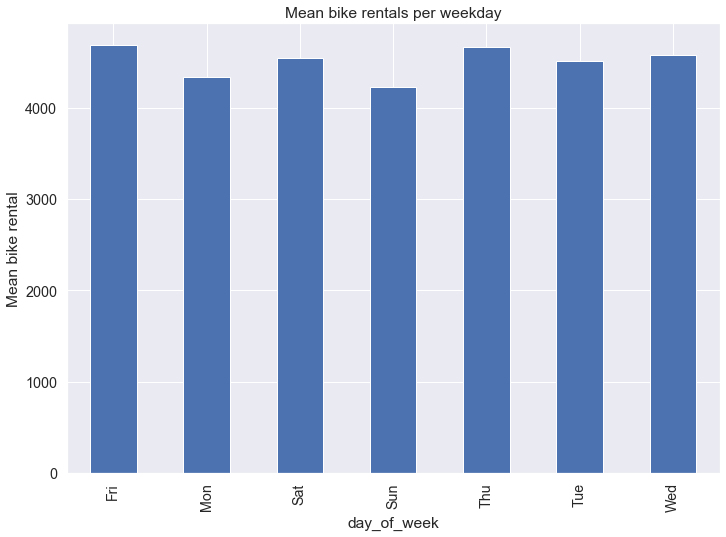

In [27]:
df.groupby('day_of_week').cnt.mean().plot.bar()
plt.title('Mean bike rentals per weekday')
plt.ylabel('Mean bike rental')

In [28]:
# Droping the original columns after the dummy variables have been created
df=df.drop(['weekday', 'weathersit', 'season', 'day_of_week', 'mnth'], axis=1)

## IV. Model building

### 1. Preparation

#### Splitting the dataset into train and test

In [29]:
from sklearn.model_selection import train_test_split

X=df.drop(['cnt'], axis=1)
y = df.cnt

train, test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Scaling the variables 

In [30]:
scaler = MinMaxScaler()
to_scale = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
train[to_scale] = scaler.fit_transform(train[to_scale])

#### Creating datasets for the features and for the target

In [31]:
y_train = train.pop('cnt')
X_train = train

### 2. Model building

#### 2.1 Automated feature selection

As we have plenty of features to select from, and manual feature selection can be tedious, this notebook follows a mixed approach. As a first step we select the best potential 20 features automatically using Recursive Feature Elminiation. The 20 best features will be dealt with manually later on. 

In [32]:
# Fitting a LinearRegression model from sklearn package for RFE
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [33]:
# Fitting the RFE for determining the best 20 features
rfe = RFE(estimator=lin_reg, n_features_to_select=20)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [34]:
# Displaying the feature ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('cloudy', True, 1),
 ('heavy_precip', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mon', False, 3),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 6),
 ('Tue', False, 4),
 ('Wed', False, 8),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 5),
 ('Maj', False, 2),
 ('Mar', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', True, 1)]

In [35]:
# Creating the train dataset for manual feature selection by keeping only the automatically selected 20 features
X_train = X_train.drop(X_train.columns[~rfe.support_].to_list(), axis=1)

#### 2.2 Manual feature selection
For the manual feature selection this notebook uses the statsmodel package as it provides wide range of statistics for analyzing model performance and for selecting features

In [36]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# As we are going to have multiple models, the models and corresponding datasets will be stored in dictionaries
my_models = {}
my_datasets = {}
my_datasets['working_copy'] = X_train_lm.copy()

In [37]:
# "letsremove" is a helper function for eliminating one feature (given as input) at a time
def letsremove(to_drop, data=X_train_lm):
    my_datasets['working_copy'].drop(to_drop, axis=1, inplace=True)
    
# "my_train" is a helper function for model building and evaluation. It:
# - stores the dataset used for modeling
# - It fits the model and stores the fitted model 
# - It prints out the OLS statistics and VIF
def my_train(ver):
    
    my_datasets['X_train_{vers}'.format(vers=ver)] = my_datasets['working_copy'].copy()
    my_models['lr_{vers}'.format(vers=ver)] = sm.OLS(y_train, my_datasets['working_copy']).fit()
    print(my_models['lr_{vers}'.format(vers=ver)].summary())
    vif = pd.DataFrame()
    vif['Features'] = my_datasets['working_copy'].columns
    vif['VIF'] = [variance_inflation_factor(my_datasets['working_copy'].values, i) for i in range(my_datasets['working_copy'].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    
def revert_to(ver):
    my_datasets['working_copy'] = my_datasets['X_train_{v}'.format(v=ver)].copy()

### Actual models

#### Model 0 with the 20 features

In [38]:
my_train(0)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.3
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          3.20e-189
Time:                        16:53:49   Log-Likelihood:                 525.51
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2062      0.027      7.731   

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


This is a raw model with several "infinit" VIFs and non-relevant coefs. 

#### Model 1
For Model 1 the 'holiday' is removed as it clearly correlates with 'Saturday' and 'Sunday'

In [39]:
letsremove('holiday')

In [40]:
my_train(1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.3
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          3.20e-189
Time:                        16:53:49   Log-Likelihood:                 525.51
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1955      0.042      4.698   

Both R squared and Adjusted R squared remained the same. We got rid of the "infinite" VIF-s as expected but we still have some huge VIF values there and some of the coefficients are not significatn. 

#### Model 2
temp and atemp are clearly correlating. Lets remove atemp as it is less objective than temp

In [41]:
letsremove('atemp')

In [42]:
my_train(2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.9
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          2.58e-190
Time:                        16:53:49   Log-Likelihood:                 525.48
No. Observations:                 510   AIC:                            -1013.
Df Residuals:                     491   BIC:                            -932.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1951      0.042      4.697   

With the same R squared and adjusted R squared the model keeps improving in terms of multicollinearity and significance of the coefficients 

In [43]:
letsremove('Sat') #Sat and Sun clearly correlates with 'workingday' however the latter contains more info (holidays) so I decided to go with Sat

#### Model 3

In [44]:
my_train(3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.5
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          3.62e-188
Time:                        16:53:49   Log-Likelihood:                 517.65
No. Observations:                 510   AIC:                            -999.3
Df Residuals:                     492   BIC:                            -923.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2910      0.034      8.555   

In [45]:
letsremove('spring') # High VIF


#### Model 4

In [46]:
my_train(4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     168.8
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          3.53e-188
Time:                        16:53:49   Log-Likelihood:                 514.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     493   BIC:                            -924.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2453      0.028      8.898   

In [47]:
letsremove('workingday') #high P value

#### Model 5

In [48]:
my_train(5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          2.86e-189
Time:                        16:53:49   Log-Likelihood:                 514.88
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     494   BIC:                            -930.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2489      0.026      9.443   

In [49]:
letsremove('July') #P value

### Model 6

In [50]:
my_train(6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.9
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          3.72e-189
Time:                        16:53:50   Log-Likelihood:                 511.87
No. Observations:                 510   AIC:                            -993.7
Df Residuals:                     495   BIC:                            -930.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2513      0.026      9.493   

In [51]:
letsremove('Feb')

#### Model 7

In [52]:
my_train(7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.1
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          5.04e-189
Time:                        16:53:50   Log-Likelihood:                 508.78
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     496   BIC:                            -930.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2186      0.023      9.510   

We are loosing to much on R squared and there are some high(ish) p values. Removing all the months doesn't help.
So let's stop here with this line of models and let's start it from scratch using a different path.

In [53]:
revert_to(0) #Reverting back to the original dataset

#### Model 8

In [54]:
my_train(8)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.3
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          3.20e-189
Time:                        16:53:50   Log-Likelihood:                 525.51
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2062      0.027      7.731   

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


We got the same results as in case of model 0, so the revert was successful

In [55]:
letsremove('holiday') #inf VIF just like we did before

#### Model 9

In [56]:
my_train(9)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.3
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          3.20e-189
Time:                        16:53:50   Log-Likelihood:                 525.51
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1955      0.042      4.698   

In [57]:
letsremove('atemp') # High VIF just like we did before

#### Model 10

In [58]:
my_train(10)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.9
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          2.58e-190
Time:                        16:53:50   Log-Likelihood:                 525.48
No. Observations:                 510   AIC:                            -1013.
Df Residuals:                     491   BIC:                            -932.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1951      0.042      4.697   

In [59]:
# This time lets get rid of the days 

letsremove('Sat')
letsremove('Sun')

#### Model 11

In [60]:
my_train(11)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     167.7
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          1.39e-187
Time:                        16:53:50   Log-Likelihood:                 513.56
No. Observations:                 510   AIC:                            -993.1
Df Residuals:                     493   BIC:                            -921.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2738      0.034      8.125   

In [61]:
letsremove('Feb') #High P value and I want to keep the 'spring' in

#### Model 12

In [62]:
my_train(12)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.8
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          5.65e-188
Time:                        16:53:50   Log-Likelihood:                 511.79
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     494   BIC:                            -923.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2600      0.033      7.891   

In [63]:
# Spring still has a high(ish) VIF. However as I want to keep it in, i try to remove high
# P value variables that might predict it

letsremove('Dec') 

#### Model 13

In [64]:
my_train(13)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.8
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          3.98e-188
Time:                        16:53:50   Log-Likelihood:                 509.41
No. Observations:                 510   AIC:                            -988.8
Df Residuals:                     495   BIC:                            -925.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2403      0.032      7.565   

In [65]:
# VIF for Spring is shrinking. Let's try some other months with high P values
letsremove('Jan')

#### Model 14

In [66]:
my_train(14)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.7
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          2.17e-188
Time:                        16:53:50   Log-Likelihood:                 507.27
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     496   BIC:                            -927.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2257      0.031      7.269   

In [67]:
letsremove('Nov') #High P

In [68]:
my_train(15)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          7.52e-189
Time:                        16:53:50   Log-Likelihood:                 505.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     497   BIC:                            -930.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2174      0.031      7.062   

In [69]:
revert_to(0)

In [70]:
my_train(16)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.3
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          3.20e-189
Time:                        16:53:50   Log-Likelihood:                 525.51
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2062      0.027      7.731   

/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/homebrew/Caskroom/miniforge/base/envs/ds/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [71]:
letsremove('Sat')
letsremove('Sun')

In [72]:
my_train(17)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.7
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          2.82e-187
Time:                        16:53:50   Log-Likelihood:                 518.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     491   BIC:                            -917.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2758      0.033      8.240   

In [73]:
letsremove('temp')

In [74]:
my_train(18)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     156.9
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          4.30e-186
Time:                        16:53:50   Log-Likelihood:                 512.67
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     492   BIC:                            -913.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3023      0.033      9.216   

In [75]:
letsremove('summer')

In [76]:
my_train(19)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     166.2
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          8.71e-187
Time:                        16:53:50   Log-Likelihood:                 511.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     493   BIC:                            -917.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3269      0.028     11.786   

In [77]:
letsremove('workingday')

#### Model 20

In [78]:
my_train(20)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.2
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          3.41e-187
Time:                        16:53:50   Log-Likelihood:                 509.92
No. Observations:                 510   AIC:                            -987.8
Df Residuals:                     494   BIC:                            -920.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3380      0.027     12.457   

In [79]:
letsremove('Feb')

In [80]:
my_train(21)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.4
Date:                Fri, 04 Feb 2022   Prob (F-statistic):          1.82e-187
Time:                        16:53:50   Log-Likelihood:                 507.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     495   BIC:                            -922.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3278      0.027     12.259   

Model 21 seems to be a pretty solid model. High R squared while the P value of the T stat. is very, that means a significant overall model. 
Also the p values of the coefficients are low meaning that the coeffs are significant. 
VIF is below 5 for all of the features.
For now, this is the "chosen" model. Let's see the residuals!

### 3. Residual analysis on train data

In [81]:
def residual_analysis(ver):

    X_train_int = my_datasets['X_train_{vers}'.format(vers=ver)].copy()
    
    y_train_pred = my_models['lr_{v}'.format(v=ver)].predict(X_train_int)
    print('R2 score of model {v} on the train set is:'.format(v=ver), r2_score(y_train, y_train_pred))
    sns.histplot(y_train-y_train_pred, kde=True)
    plt.title('Distribution of error terms')
    plt.xlabel('Errors')
    plt.show()
    sns.regplot(x=y_train, y=y_train_pred)
    plt.title('y_tran vs y_train_pred')
    plt.xlabel('Observed bike rentals')
    plt.ylabel('Predicted bike rentals')
    plt.show()
    sns.scatterplot(x=y_train_pred, y=(y_train-y_train_pred))
    plt.title('Predicted value vs Error terms')
    plt.ylabel('Errors')
    plt.xlabel('Predicted y')
    plt.show()
    sns.scatterplot(x=y_train.index, y=(y_train-y_train_pred))
    plt.title('Error terms vs observation order')
    plt.ylabel('Errors')
    plt.xlabel('Observation order')
    plt.show()

R2 score of model 21 on the train set is: 0.8412620566842259


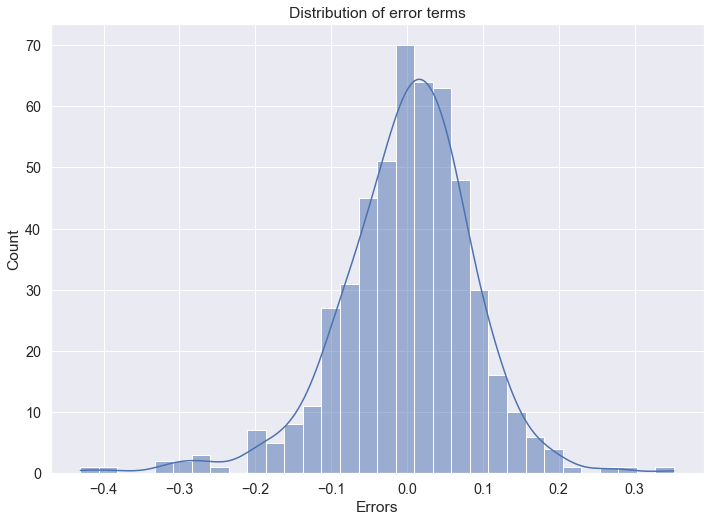

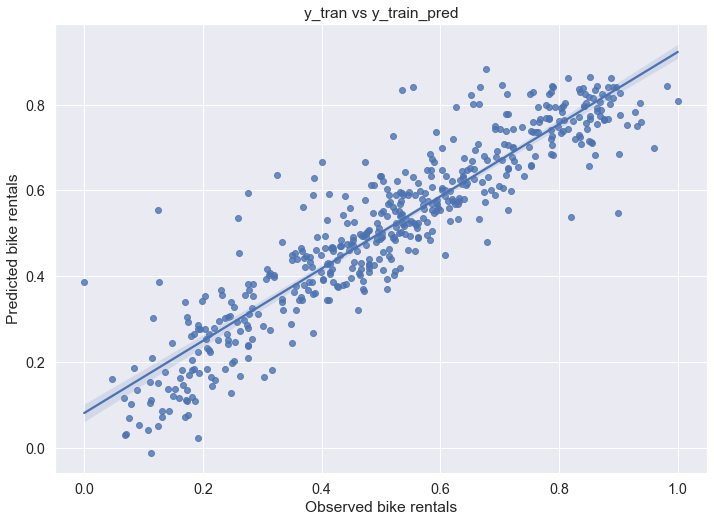

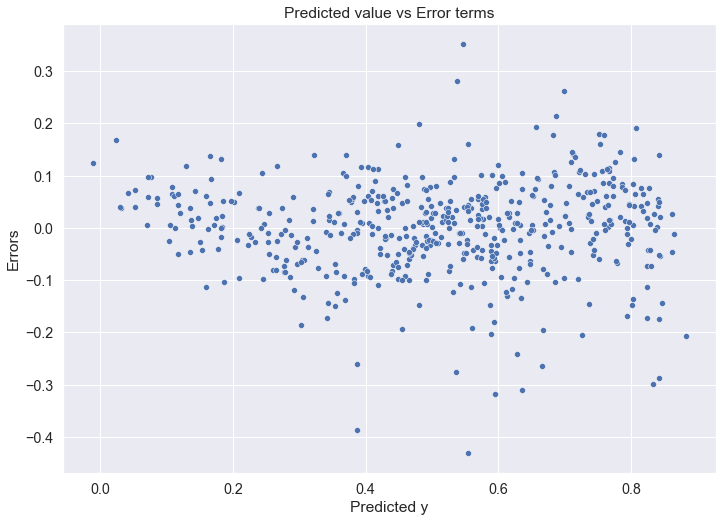

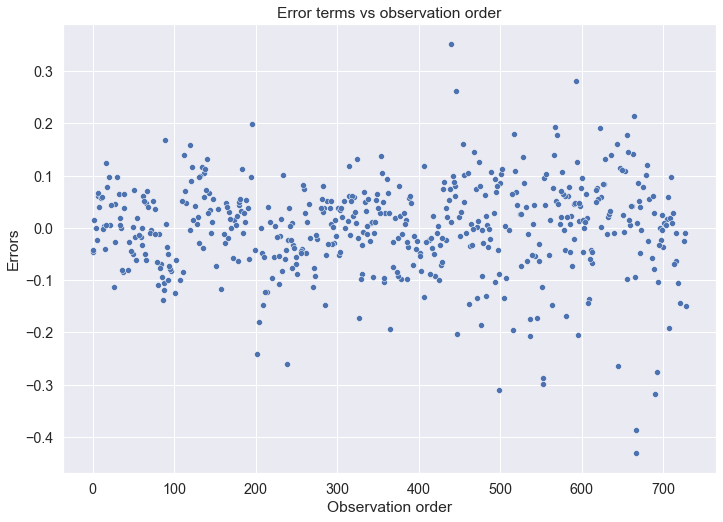

In [82]:
residual_analysis(21)

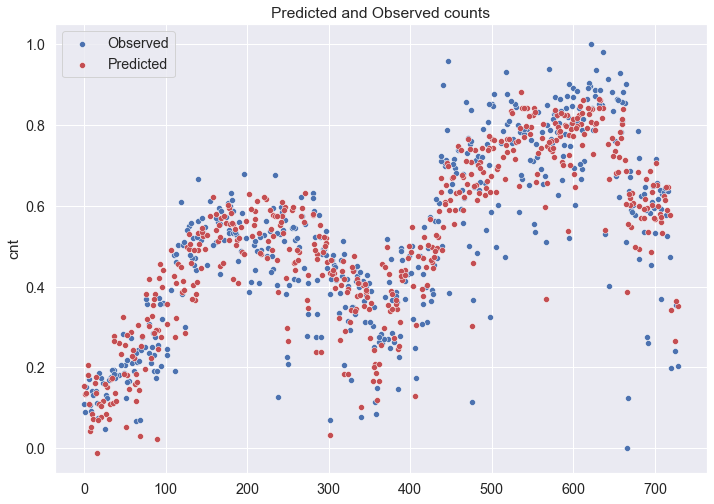

In [83]:
X_train_plot = my_datasets['X_train_21']
y_train_pred = my_models['lr_21'].predict(X_train_plot)


fig, ax = plt.subplots()
sns.scatterplot(x=y_train.index, y=y_train)
sns.scatterplot(x=y_train_pred.index, y=y_train_pred, color='r')
ax.legend(['Observed', 'Predicted'])
plt.title('Predicted and Observed counts')
plt.show()

**Linearity**

The model correctly fits the linear pattern.

**Distribution of error terms**

As it can be observed on the histogram above, the distribution of the error terms approaches normal around mean 0. It means that the "Normality" criteria of the error terms is fulfilled.

**Error terms are independent of eachother**

As it can be seen on the error terms vs. observation order plot, there is no real pattern. Error terms are independend of eachother

**Homoscedasticity**

Well, the variance of the error term is not quite constant (predicted vs error terms scatter). There is a bit higher variance of the error term for higher predicted values. Hence, we observe slight hetersocedasticity here. 

**Multicollinearity**

Looking at the VIF values we can say that no independent variable is a perfect linear combination of other independent variables

**Model fit**

The model is a good predictor of the target variable. The model managed to capture trends and shows no signs of overfitting.



So it all tells that the modell is quite decent, but far from perfect. There is a significant part in the variance that it can't explain. Anyhow, this is the best we have got, so let's see the performance on the test set!

## V. Making prediction 

### 1. Scaling the test set
We scale the test set by using the scaler that was fit on the training data

In [84]:
test[to_scale] = scaler.transform(test[to_scale])

### 2. Preparation
test_model is a helper function similar to the residual analysis one but it is also slighty different:
- It takes the model version as an input
- Selects the columns of the test set that are used by the chosen model
- Predicts the target variables 
- Prints the R2 score of the model on test set
- Prints scatter plots for residual analysis

In [85]:
def test_model(ver):
    test_df = test.copy()

    y_test = test_df.pop('cnt')
    X_test = sm.add_constant(test_df)
    X_test_int = X_test[my_datasets['X_train_{v}'.format(v=ver)].columns.tolist()].copy()
    y_test_pred = my_models['lr_{v}'.format(v=ver)].predict(X_test_int)
    print('R2 score of model {v} on the test set is:'.format(v=ver), r2_score(y_test, y_test_pred))
    sns.histplot(y_test-y_test_pred, kde=True)
    plt.title('Distribution of error terms')
    plt.xlabel('Errors')
    plt.show()
    sns.regplot(x=y_test, y=y_test_pred)
    plt.title('y_test vs y_test_pred')
    plt.xlabel('y_test')
    plt.ylabel('y_test_pred')
    plt.show()
    sns.scatterplot(x=y_test_pred, y=(y_test-y_test_pred))
    plt.title('Error terms vs fitted value')
    plt.xlabel('y_test_pred')
    plt.ylabel('Errors')
    plt.show()
    sns.scatterplot(x=y_test.index, y=(y_test-y_test_pred))
    plt.title('Error terms vs overvaton order')
    plt.xlabel('observation order')
    plt.ylabel('Errors')
    plt.show()
    

Making prediction by using and testing Model 22

### 3. Prediction and analysis

R2 score of model 21 on the test set is: 0.8290546183844709


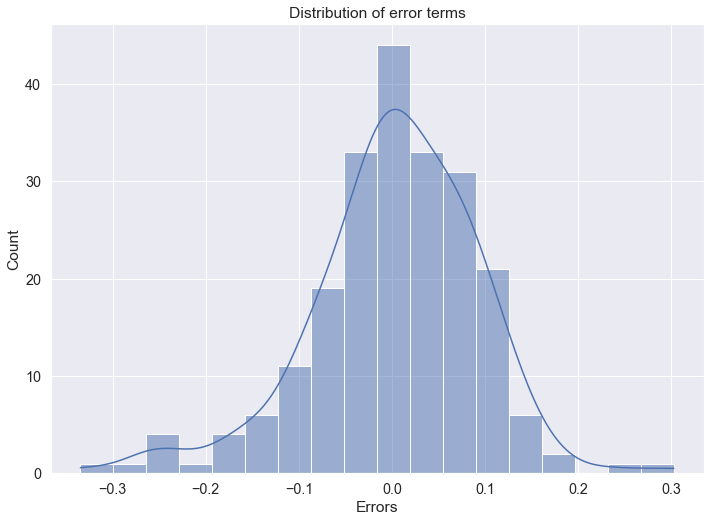

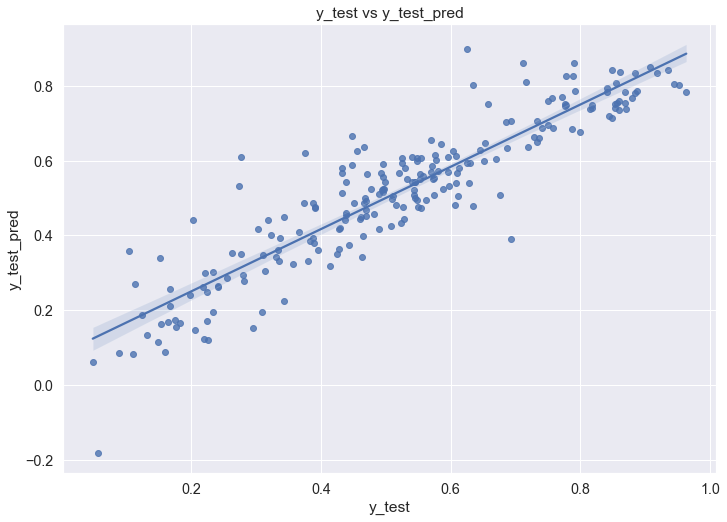

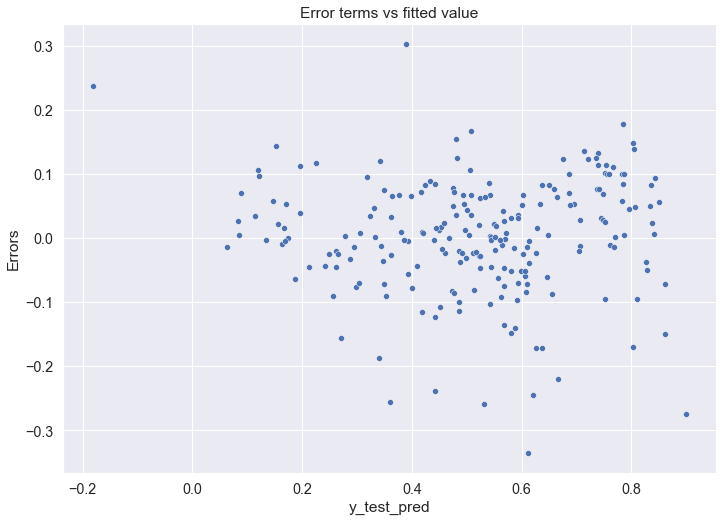

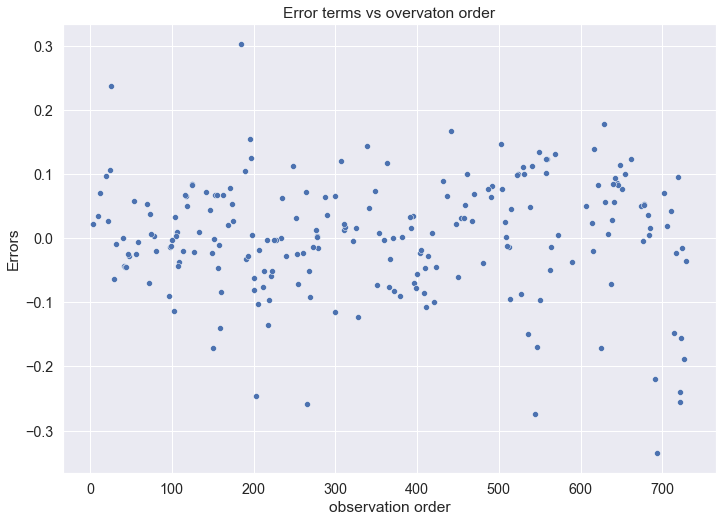

In [86]:
test_model(21)

In [87]:
final_model = my_models['lr_21']
X_colls = my_datasets['X_train_21'].columns.tolist()

test_df = test.copy()
test_df = sm.add_constant(test_df)
X_test = test_df[X_colls]
y_pred = final_model.predict(X_test)
y_test = test_df.cnt

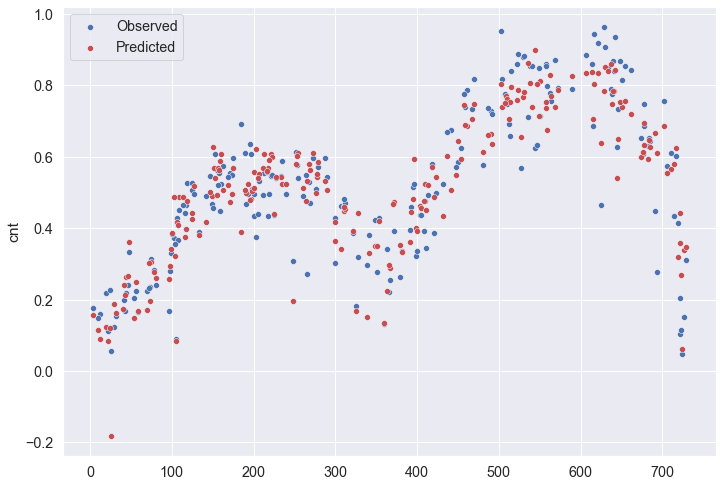

In [88]:
fig, ax = plt.subplots()
sns.scatterplot(x=y_test.index, y=y_test)
sns.scatterplot(x=y_pred.index, y=y_pred, color='r')
ax.legend(['Observed', 'Predicted'])
plt.show()

### 4. Conclusions

The error terms are distributed around the mean 0 normally. Just like in case of training data. 

The distribution of error terms is quite random, the pattern is not stronger on the test set than it was on the training set. 

The model predicts the target variable well, the R squared calculated on the test set is relatively close to the one calculated on the training set, which indicates no overfitting. It means that the model performs well on the unseen dataset as well. 

However it is obvious that the year 1 data differs from the year 0. Considering the fact that there has been a **significant dataset shift** from year 0 to year 1, additionally considering the fact that the **pandemy has changed the way people live, work etc.** I expect another significant shift in the underlying data for the upcoming year. It all means that I **expect the predictive power of the model to decline** for the next period. 

**Equation**

*Bike rental count* =  0.4537\**atemp* - 0.2382\**heavy_precip* + 0.2311\**yr* - 0.1666\**windspeed* - 0.1183\**hum* - 0.1038\**spring* - 0.0874\**holiday* + 0.0678\**winter* + 0.0591\**Sep* - 0.0471\**Dec* - 0.0504\**Nov* - 0.0519\**Jan* - 0.0554\**cloudy* - 0.0688\**July* + 0.3278

It is visible that the following features have the biggest impact on the rental:

- Weather:
    - Feeling temperature (1 unit increase of atemp increases the rentyl by 0.447 units )
    - Heavy rain / or snow conditions (heavy condition decreases the rental by 0.249 units)
    - Windspeed
    - Humidity
    
- Year
    - as the company is growing, the year allone explains 0.2321 unit increase in bike rentals
    

**Recommendation**:
It would be recommended to expand the business in cities where the weather conditions are better for bikers. High (but not too high) temperature, rare heavy rain/snow conditions, moderate windspeed and ideal humidy.
Also there is a left skewness in the rental numbers. Why is that? Is there an upper bound? Is there a limit in the number of bicycles that are available for rent? Well, certainly there is. So the question here is if it is responsible for the skewness? It is hard to answer that question without having utilization numbers. If the hypothesis is true, it means that the company looses money buy not serving potential customers as on some days the demand is most likely higher than what the company can serve with the current number of bikes. 


### 5. R2
Calculating R squared as requested by the assignment

In [89]:
r2_score(y_test, y_pred)

0.8290546183844709